**Задание 1. Генератор случайных матриц.**

Реализовать генератор матриц, который должен поддерживать функции:

Генерация абсолютно случайной матрицы $n \times m$

Генерация случайной диагональной матрицы $n \times n$

Генерация случайной верхнетреугольной матрицы

Генерация случайной нижнетреугольной матрицы

Генерация симметричной матрицы

Генерация вырожденной матрицы

Генерация матрицы ступенчатого вида $n \times n$ ранга $m$ 

Генерация возмущения матрицы $n \times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$.
Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).

Оценить численно вероятность того, что созданная матрица будет вырожденной для какого-либо случая выше.

In [300]:
# Реализую произвольную m,n, верхнетреугольную и симметричную. Остальное на вас - вам нужно дописать функцию.
# Не забудьте откомментировать ваши изменения в документации к функции!

import numpy as np

def matrix_generate(rows, columns=None, type_ = "full", eps = 0):
    """
    matrix_generate(rows, columns=None, type_ = "full", eps = 0)

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице. Если None, то columns = rows.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "lower_triangular" "symmetric", "diagonal", 
                                 "singular", "staircase", "perturbation"
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц. Для "staircase" - ранг матрицы.
        Для "perturbation" - число ограничивающее модуль элементов матрицы.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full", "upper_triangular", "lower_triangular" "symmetric", "diagonal", 
        "singular", "staircase", "perturbation"


    """
    if columns == None:
        columns = rows
    
    if type_ in ("diagonal", "symmetric", "singular", "staircase"):
        if rows != columns:
            print(f"Error with type {type_} and shape ({rows},{columns})")
            return None
    
    if type_ == "perturbation":
        return np.random.uniform(-abs(eps), abs(eps), size=(rows, columns))
    
    A = np.random.random(size=(rows, columns))
    
    if type_ == "upper_triangular":
        A[np.tril_indices(rows, -1, columns)] = 0
    elif type_ == "lower_triangular":
        A[np.triu_indices(rows, 1, columns)] = 0
    elif type_ == "symmetric":
        A[np.triu_indices(rows, 1, columns)] = 0
        A = A + A.T - np.diag(np.diag(A))
    elif type_ == "diagonal":
        A = np.diag(np.diag(A))
    elif type_ == "singular":
        
        if rows == 1:
            return np.array([0])
        
        det = np.linalg.det(A)
        
        if det != 0:
            for i in range(rows):
                col_mask = np.ones(rows, dtype=bool)
                col_mask[i] = False

                sub_det = np.linalg.det(A[1:, col_mask])

                if sub_det != 0:
                    A[0, 0] -= (det / sub_det)
                    break
    
    elif type_ == "staircase":
        diff = rows - eps
        
        if diff < 0:
            print(f"Error with type {type_}. eps > rows")
            return None
        
        steps = np.ones(rows)
        steps[0] = 0
        
        for i in range(diff):
            steps[np.random.randint(0, rows)] += 1
            
        mask = np.ones((rows, rows), dtype=bool)
        current_column = 0
        for i in range(eps):
            current_column += steps[i]
            mask[i, int(current_column):] = False
        
        A[mask] = 0

    elif type_ != "full":
        print(f"Error: unknown type {type_}")
        return None
    
    return A

In [301]:
matrix_generate(1, 3)

array([[0.80030466, 0.69912076, 0.67423998]])

In [302]:
matrix_generate(4, 4, type_ = "upper_triangular")

array([[0.07822881, 0.48847665, 0.24634217, 0.39751452],
       [0.        , 0.53828782, 0.60740314, 0.12967995],
       [0.        , 0.        , 0.19475333, 0.96702993],
       [0.        , 0.        , 0.        , 0.21627007]])

In [303]:
matrix_generate(4, 3, type_ = "upper_triangular")

array([[0.21496196, 0.78751696, 0.82103613],
       [0.        , 0.10417638, 0.3523525 ],
       [0.        , 0.        , 0.24402457],
       [0.        , 0.        , 0.        ]])

In [304]:
matrix_generate(4, 4, type_ = "symmetric")

array([[0.56248162, 0.30179052, 0.84941903, 0.2451779 ],
       [0.30179052, 0.80290269, 0.09360371, 0.5415165 ],
       [0.84941903, 0.09360371, 0.85698612, 0.58023571],
       [0.2451779 , 0.5415165 , 0.58023571, 0.79062006]])

In [305]:
matrix_generate(4, 1, type_ = "symmetric")

Error with type symmetric and shape (4,1)


$$
\|A\|_\infty = \max\limits_i\sum\limits_j |a_{ij}|; \; \|A\|_1 = \max\limits_j\sum\limits_i |a_{ij}|; \;
\|A\|_e = \sqrt{\lambda_{max}\left(A^TA\right)}; \ \|A\|_F = \sqrt{\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n}|a_{ij}|^2}
$$

Для матрицы возмущения $P(\varepsilon):$
$$
\|P\|_\infty \leq m \, \varepsilon; \;
\|P\|_1 \leq n \, \varepsilon; \;
\|P\|_e \leq \varepsilon; \;
\|P\|_F \leq \sqrt{nm} \, \varepsilon
$$

In [682]:
def singularity_probability(rows, columns=None, type_="full", eps=0, n=1000000):
    n_singular = 0
    
    for _ in range(n):
        mrx = matrix_generate(rows, columns, type_, eps)
        if (abs(np.linalg.det(mrx)) < rows**2*10**-7):
            n_singular += 1
    
    return n_singular/n
    

In [684]:
size = 15
step = 1
start = 50

x = np.zeros(int(size/step))
y = np.zeros(int(size/step))

idx = 0

for i in range(start, size+start, step):
    x[idx] = i
    y[idx] = singularity_probability(i, i, "singular", 0, 1000)
    idx += 1

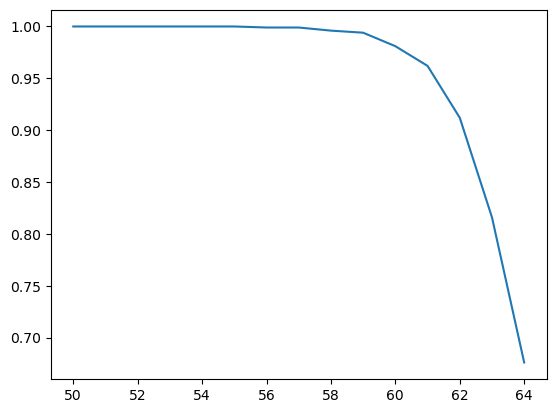

In [685]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.show()

In [683]:
singularity_probability(10)

0.000795

In [686]:
singularity_probability(10, type_="upper_triangular")

0.28733

In [687]:
singularity_probability(10, type_="symmetric")

0.00072

In [698]:
singularity_probability(10, type_="diagonal")

0.287645

In [690]:
singularity_probability(10, type_="staircase", eps=5)

1.0

In [697]:
singularity_probability(10, type_="perturbation", eps=0.0001)

1.0

**Задание 2. Вычисление матричных норм и числа обусловленности.**

Реализовать вычисление трех основных норм векторов (L1, L2 и максимальную) и подчиненных им матричных норм. Реализовать вычисление числа обусловленности.

Примечание: для вычисления собственных значений можно использовать linalg.eigvals из модуля scipy.

$$
\|x\|_1 = \sum\limits_{i=1}^{n} |x_i|; \; 
\|x\|_2 = \left({\sum\limits_{i=1}^{n} x_i^2}\right)^{\frac{1}{2}}; \; 
\|x\|_\infty = \max\limits_i |x_i|
$$

In [701]:
def L1_norm(v):
    return np.sum(np.absolute(v))

def L2_norm(v):
    return np.sqrt(np.sum(np.square(v)))

def L_infty_norm(v):
    return np.max(np.absolute(v))

In [702]:
v = np.array([1, 2, 3, -5])

In [703]:
L1_norm(v)

11

In [704]:
L2_norm(v)

6.244997998398398

In [705]:
L_infty_norm(v)

5

$$
\|A\|_1 = \max\limits_j\sum\limits_i |a_{ij}|; \;
\|A\|_2 = \sqrt{\lambda_{max}\left(A^TA\right)}; \; 
\|A\|_\infty = \max\limits_i\sum\limits_j |a_{ij}|;
$$

In [765]:
import scipy

def L1_matrix_norm(A):
    return np.max(np.sum(np.absolute(A), 0))

def L2_matrix_norm(A):
    return np.sqrt(np.max(scipy.linalg.eigvals(np.matmul(A, A.T))))

def L_infty_matrix_norm(A):
    return np.max(np.sum(np.absolute(A), 1))

In [766]:
A = np.array([[1, 2], 
              [2, 1]])

In [767]:
L1_matrix_norm(A)

3

In [768]:
L2_matrix_norm(A)

(3+0j)

In [769]:
L_infty_matrix_norm(A)

3

$$
\mu = \|A\|*\|A^{-1}\|
$$

In [770]:
def mu(A, norm):
    return norm(A)*norm(scipy.linalg.inv(A))

In [774]:
print(A)
print(scipy.linalg.inv(A))

[[1 2]
 [2 1]]
[[-0.33333333  0.66666667]
 [ 0.66666667 -0.33333333]]


In [772]:
mu(A, L1_matrix_norm)

3.0

In [775]:
mu(A, L2_matrix_norm)

(3+0j)

In [777]:
mu(A, L_infty_matrix_norm)

3.0

**Задание 3. Эквивалентность первых двух норм.**

Найдите константы $C_1$ и $С_2$ такие, что

$C_1 ||x||_2 \leq ||x||_1 \leq C_2||x||_2 $

Указание: в качестве подсказки можно использовать визуализацию норм из документа с теорией.

$$
\|x\|_1 = \sum\limits_{i=1}^{n} |x_i|; \; 
\|x\|_2 = \left({\sum\limits_{i=1}^{n} x_i^2}\right)^{\frac{1}{2}}
$$

$$
\left(\sum\limits_{i=1}^{n} |x_i| \right)^2 \geq {\sum\limits_{i=1}^{n} x_i^2} \Rightarrow C_1 = 1\\
\forall i, j \quad x_{max}^2 \geq x_i x_j \Rightarrow n^2{\sum\limits_{i=1}^{n} x_i^2} 
\geq \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n} |x_i x_j| = \left(\sum\limits_{i=1}^{n} |x_i| \right)^2
\Rightarrow  C_2 = n
$$

**Задание 4. Евклидова и бесконечная норма.**

Пусть $x$ — вектор размерности $m$, а $A$ — матрица $m \times n$. Докажите следующие неравенства и приведите примеры таких $x$ и $A$, при которых неравенства обращаются в равенства:
$$
\|x\|_2 \leq \sqrt{m} \cdot \|x\|_\infty \\
\|A\|_\infty \leq \sqrt{n} \cdot \|A\|_2
$$

$$
m \cdot x_{max}^2 \geq \sum\limits_{i=1}^{m} x_i^2 \Rightarrow \sqrt{m} \cdot \|x\|_\infty \geq \|x\|_2
\quad Достигается \, при \, x_i = 1
$$

$$
\|A\|_\infty = \sup\limits_{x} \frac{\|Ax\|_\infty}{\|x\|_\infty} =
\sup\limits_{x}\frac{\max\limits_i |(Ax)_i|}{\max\limits_j |x_j|}\\
\|A\|_2 = \sup\limits_x \frac{\|Ax\|_2}{\|x\|_2} = \sup\limits_x 
\left(\frac{\sum\limits_{i=1}^{n} (Ax)_i^2}{\sum\limits_{j=1}^{n} x_j^2}\right)^\frac{1}{2}
$$

$$
\sum\limits_{i=1}^n (Ax)_i^2 \geq \max\limits_i (Ax)_i^2; \quad n \max\limits_j x_j^2 \geq \sum\limits_{j=1}^n x_j^2
$$

$$
\forall x \quad \frac{\sum\limits_{i=1}^n (Ax)_i^2}{\sum\limits_{j=1}^n x_j^2} \geq 
\frac{\max\limits_i (Ax)_i^2}{n \max\limits_j x_j^2}
\Rightarrow \sqrt{n}\|A\|_2 \geq \|A\|_\infty\\
Достигается \, при \, A = 1
$$

**Задание 5. Норма Фробениуса.**

Докажите, что для любой унитарной матрицы $U$ (и для произвольной матрицы $A$) имеет место равенство

$$
\|UA\|_F = \|AU\|_F = \|A\|_F, \\
где \, \|\cdot\|_F \,- норма \, Фробениуса.
$$

Указание.

Задачу можно решить без вычислений, если использовать геометрический смысл нормы Фробениуса и геометрические свойства умножения на унитарную матрицу (что при умножении на неё сохраняется).

$$
\|A\|_F^2 = \sum\limits_{i=1}^n\sum\limits_{j=1}^n |a_{ij}|^2\\
(A^\dagger A)_{ij} = \sum\limits_{k=1}^n A^\dagger_{ik}A_{kj} = \sum\limits_{k=1}^n a^*_{ki}a_{kj}\\
tr(A^\dagger A) = \sum\limits_{i=1}^n (A^\dagger A)_{ii} = \sum\limits_{i=1}^n \sum\limits_{k=1}^n a^*_{ki}a_{ki} = 
\sum\limits_{i=1}^n \sum\limits_{k=1}^n |a_{ki}|^2 = \|A\|_F^2\\
\|UA\|_F^2 = tr\left(\left(UA\right)^\dagger UA\right) = tr\left(A^\dagger U^\dagger U A \right) = tr\left(A^\dagger A\right) = \|A\|_F^2\\
\|AU\|_F^2 = tr\left(\left(AU\right)^\dagger AU\right) = tr\left(U^\dagger A^\dagger A U \right) = tr\left(A^\dagger A U U^\dagger\right) =
tr\left(A^\dagger A\right) = \|A\|_F^2
$$